In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from wordcloud import WordCloud

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#load data
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
data.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.shape

(2200, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Data Analysis

<AxesSubplot:>

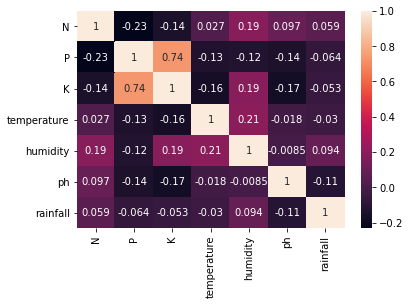

In [8]:
# corealation
corelation = data.corr()
sns.heatmap(corelation,annot=True)

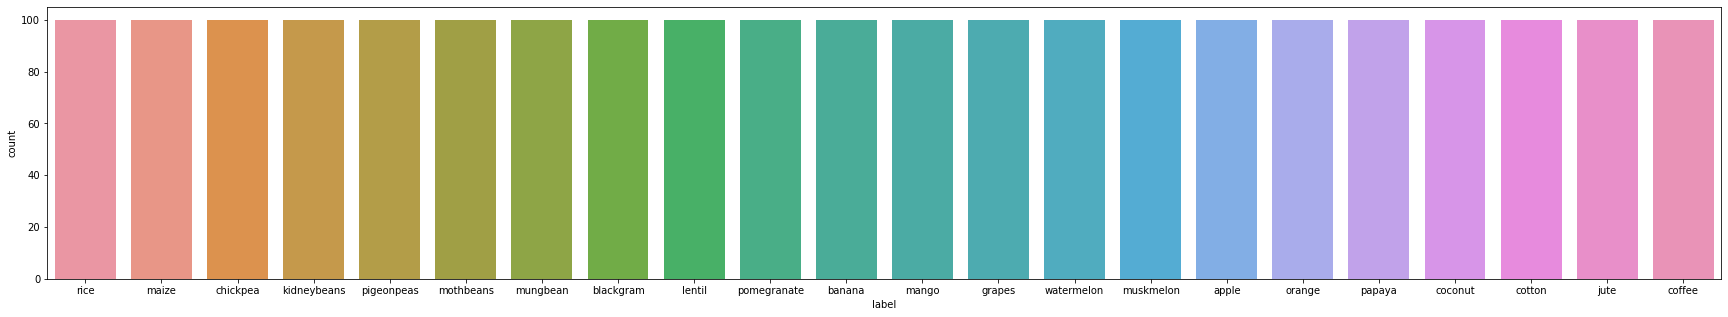

In [9]:
#checking whether the data is blance or imbalance
plt.figure(figsize=[30,5])
sns.countplot(data['label']);

#### Nutritious rich crops in india

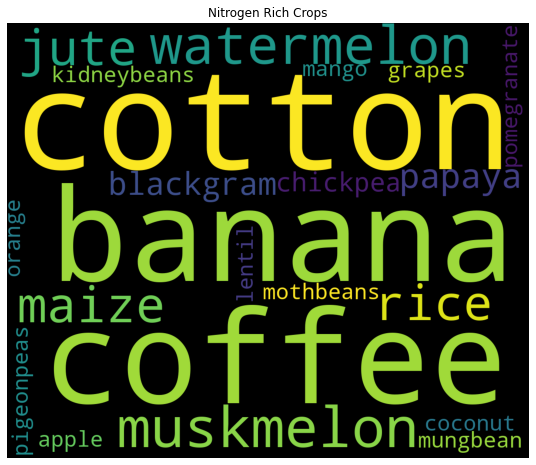

In [10]:
#Nitrogen rich crops
d =  data.groupby('label',as_index=False).max()
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','N']].values))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Nitrogen Rich Crops')
plt.axis("off")
plt.show()

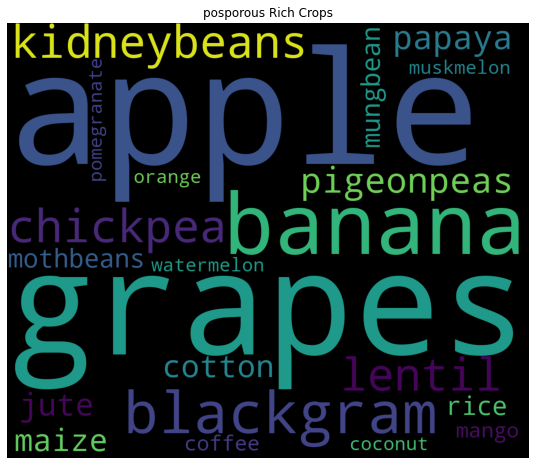

In [11]:
#posporous rich crops
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','P']].values))
plt.figure(figsize=[20,8])
plt.imshow(wordcloud)
plt.title('posporous Rich Crops')
plt.axis("off")
plt.show()

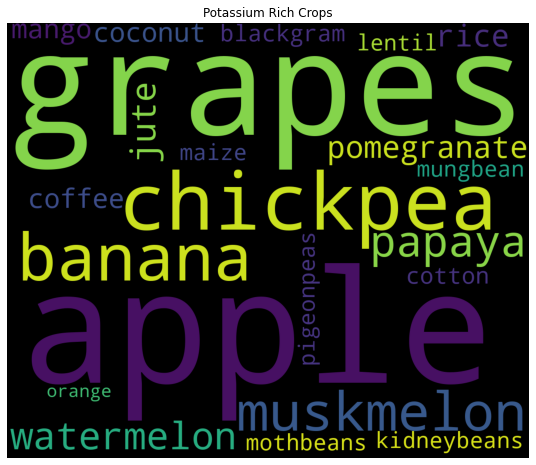

In [12]:
#potassium rich crops
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','K']].values))
plt.figure(figsize=[20,8])
plt.imshow(wordcloud)
plt.title('Potassium Rich Crops')
plt.axis("off")
plt.show()

##### Rainfall

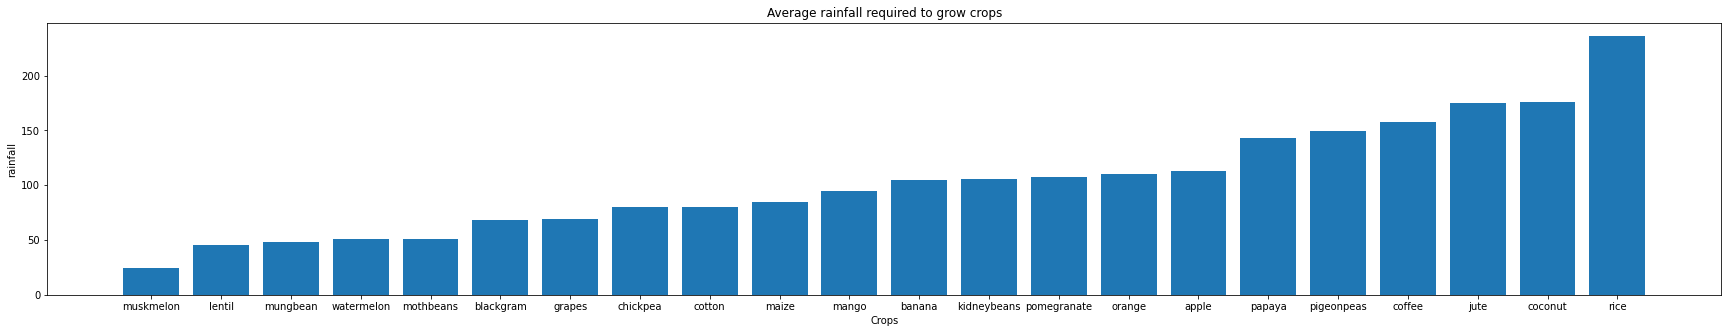

In [13]:
# Average hunudity required to grow crops
plt.figure(figsize=[30,5])
df =  data.groupby('label',as_index=False).mean()
rainfall = df[['label','rainfall']].sort_values('rainfall')
plt.bar(rainfall['label'],rainfall['rainfall'])
plt.ylabel('rainfall')
plt.xlabel('Crops')
plt.title('Average rainfall required to grow crops');

##### Humudity

Text(0.5, 1.0, 'Average humidity required to grow crops')

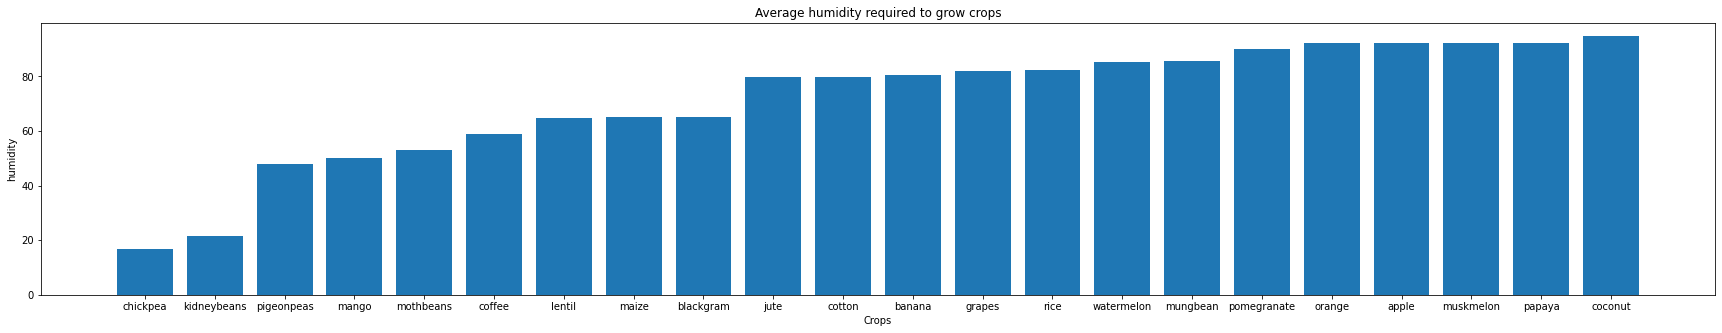

In [14]:
# Average hunudity required to grow crops
plt.figure(figsize=[30,5])
df =  data.groupby('label',as_index=False).mean()
humidity = df[['label','humidity']].sort_values('humidity')
plt.bar(humidity['label'],humidity['humidity'])
plt.ylabel('humidity')
plt.xlabel('Crops')
plt.title('Average humidity required to grow crops')

##### PH

Text(0.5, 1.0, 'Average ph required to grow crops')

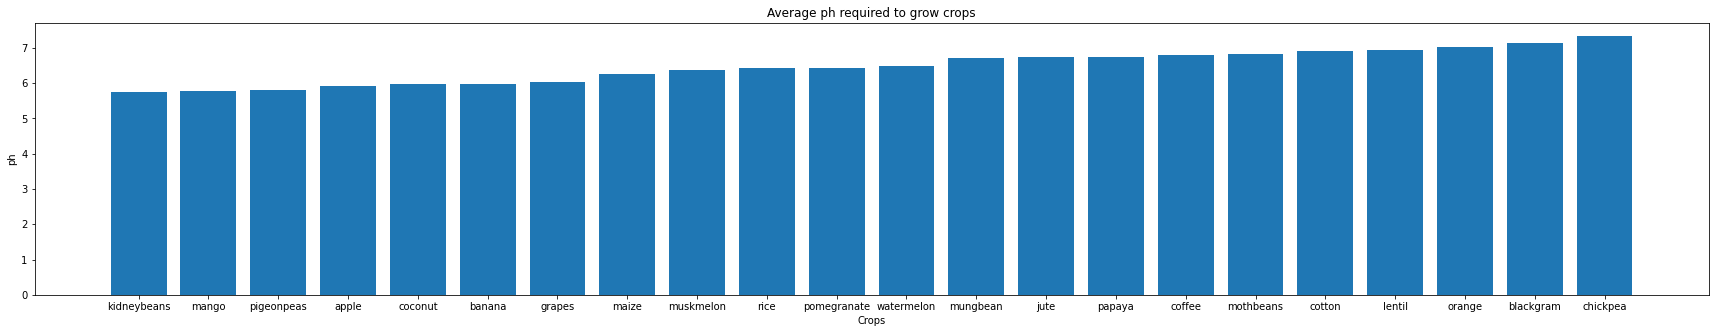

In [15]:
# Average ph required to grow crops
plt.figure(figsize=[30,5])
df =  data.groupby('label',as_index=False).mean()
ph = df[['label','ph']].sort_values('ph')
plt.bar(ph['label'],ph['ph'])
plt.ylabel('ph')
plt.xlabel('Crops')
plt.title('Average ph required to grow crops')

##### Temperature

Text(0.5, 1.0, 'Minimum temperature required to grow crops')

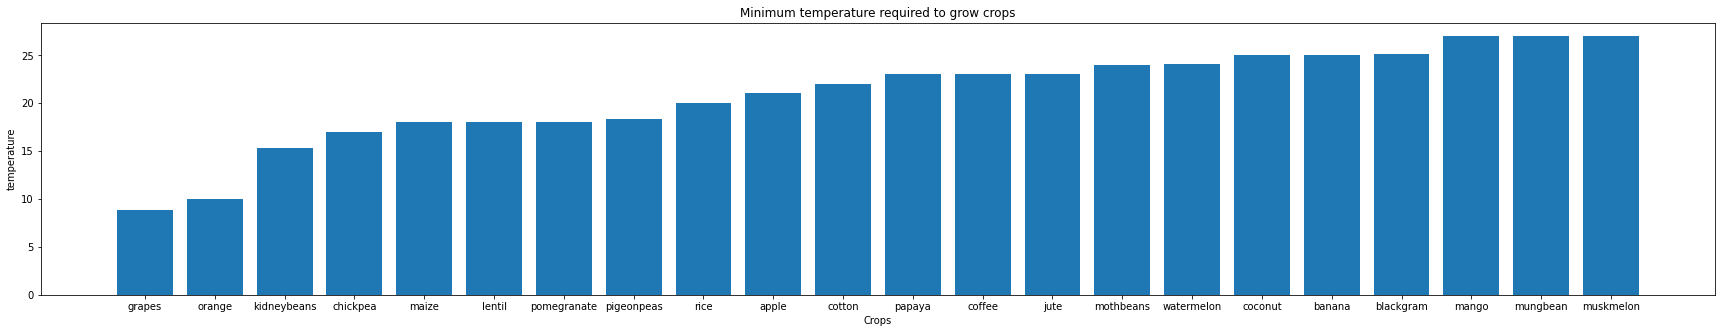

In [16]:
# Average ph required to grow crops
plt.figure(figsize=[30,5])
df =  data.groupby('label',as_index=False).min()
temperature = df[['label','temperature']].sort_values('temperature')
plt.bar(temperature['label'],temperature['temperature'])
plt.ylabel('temperature')
plt.xlabel('Crops')
plt.title('Minimum temperature required to grow crops')

In [17]:
### Model

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [19]:
X = data.drop('label',axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Decision tree

##### Ginnny

In [22]:
decison_tree_ginny = DecisionTreeClassifier(random_state=42,max_depth=11)
tree = decison_tree_ginny.fit(X_train,y_train)
y_predicted_train = decison_tree_ginny.predict(X_train)
# report for train
print(classification_report(y_true=y_train,y_pred=y_predicted_train))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        62
      banana       1.00      1.00      1.00        72
   blackgram       0.99      0.94      0.96        71
    chickpea       1.00      1.00      1.00        59
     coconut       1.00      1.00      1.00        65
      coffee       1.00      1.00      1.00        67
      cotton       1.00      1.00      1.00        67
      grapes       1.00      1.00      1.00        75
        jute       0.94      1.00      0.97        65
 kidneybeans       1.00      1.00      1.00        59
      lentil       0.92      1.00      0.96        72
       maize       1.00      1.00      1.00        68
       mango       1.00      0.95      0.98        66
   mothbeans       0.89      0.89      0.89        62
    mungbean       1.00      1.00      1.00        67
   muskmelon       1.00      1.00      1.00        74
      orange       1.00      1.00      1.00        73
      papaya       1.00    

In [23]:
#classification report for test data
y_predicted_test = decison_tree_ginny.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_predicted_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       0.82      0.93      0.87        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.79      0.94      0.86        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.88      1.00      0.93        28
       maize       1.00      1.00      1.00        32
       mango       1.00      0.94      0.97        34
   mothbeans       0.92      0.89      0.91        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

##### Entropy

In [25]:
#Decision tree with entropy critian
decison_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=6)
tree = decison_tree_entropy.fit(X_train,y_train)
y_predicted_train = decison_tree_entropy.predict(X_train)
# report for train
print(classification_report(y_true=y_train,y_pred=y_predicted_train))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        62
      banana       1.00      1.00      1.00        72
   blackgram       0.99      0.93      0.96        71
    chickpea       1.00      1.00      1.00        59
     coconut       1.00      1.00      1.00        65
      coffee       1.00      1.00      1.00        67
      cotton       1.00      1.00      1.00        67
      grapes       1.00      1.00      1.00        75
        jute       0.90      1.00      0.95        65
 kidneybeans       0.97      1.00      0.98        59
      lentil       1.00      1.00      1.00        72
       maize       1.00      1.00      1.00        68
       mango       1.00      1.00      1.00        66
   mothbeans       0.94      0.97      0.95        62
    mungbean       1.00      1.00      1.00        67
   muskmelon       1.00      1.00      1.00        74
      orange       1.00      1.00      1.00        73
      papaya       1.00    

In [26]:
#classification report for test data
y_predicted_test = decison_tree_entropy.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_predicted_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       0.97      1.00      0.98        28
   blackgram       1.00      0.93      0.96        29
    chickpea       1.00      0.98      0.99        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.74      0.91      0.82        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.97      1.00      0.98        28
       maize       1.00      0.91      0.95        32
       mango       1.00      1.00      1.00        34
   mothbeans       0.88      0.97      0.93        38
    mungbean       0.97      1.00      0.99        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

#### Random Forest tree

In [28]:
RF = RandomForestClassifier()
RF_tree= RF.fit(X_train,y_train)
y_predicted_train = RF.predict(X_train)
# report for train
print(classification_report(y_true=y_train,y_pred=y_predicted_train))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        62
      banana       1.00      1.00      1.00        72
   blackgram       1.00      1.00      1.00        71
    chickpea       1.00      1.00      1.00        59
     coconut       1.00      1.00      1.00        65
      coffee       1.00      1.00      1.00        67
      cotton       1.00      1.00      1.00        67
      grapes       1.00      1.00      1.00        75
        jute       1.00      1.00      1.00        65
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        72
       maize       1.00      1.00      1.00        68
       mango       1.00      1.00      1.00        66
   mothbeans       1.00      1.00      1.00        62
    mungbean       1.00      1.00      1.00        67
   muskmelon       1.00      1.00      1.00        74
      orange       1.00      1.00      1.00        73
      papaya       1.00    

In [29]:
#classification report for test data
y_predicted_test = RF.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_predicted_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.88      1.00      0.93        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    